# Titanic Dataset Analysis

This notebook analyzes the Titanic dataset (`train.csv`) to explore survival rates.
We clean the data, analyze survival by gender, class, and age group, and visualize results.


Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.listdir()


['Pandas_1_Loading_data.py',
 'Pandas_2_Reading_data.py',
 'Pandas_3_Sorting_describing_data.py',
 'Pandas_4_Making_changes_data.py',
 'Pandas_5_Filtering_data.py',
 'Pandas_6_Conditional_changes.py',
 'Pandas_7_Aggregate_statistics(Groupby).py',
 'Pandas_8_Working_with_large_data.py',
 'READ ME',
 'titanic.py',
 'Titanic_Project.ipynb',
 'train.csv']

Load Dataset

In [2]:
# Make sure 'train.csv' is in the same folder as this notebook
titanic= pd.read_csv('train.csv')

# Show first 5 rows
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Step 1: Inspect Data

We check data types, missing values, and summary statistics.

In [3]:
# Basic info
print(titanic.info())

# Summary statistics
print(titanic.describe())

# Check missing values
print(titanic.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     312 non-null    int64  
 1   pclass       312 non-null    int64  
 2   sex          312 non-null    object 
 3   age          249 non-null    float64
 4   sibsp        312 non-null    int64  
 5   parch        312 non-null    int64  
 6   fare         312 non-null    float64
 7   embarked     310 non-null    object 
 8   class        311 non-null    object 
 9   who          311 non-null    object 
 10  adult_male   311 non-null    object 
 11  deck         68 non-null     object 
 12  embark_town  310 non-null    object 
 13  alive        311 non-null    object 
 14  alone        311 non-null    object 
dtypes: float64(2), int64(4), object(9)
memory usage: 36.7+ KB
None
         survived      pclass         age       sibsp       parch        fare
count  312.000000  312.000000  249.

Step 2: Clean Data
 
- Fill missing age values with median age.  
- Fill missing embarked values with mode.
- Fill missing 'deck' values with 'Unknown'

In [4]:

# Fill missing age with median
if 'age' in titanic.columns:
    titanic['age']=titanic['age'].fillna(titanic['age'].median())

# Fill missing embarked with mode
if "embarked" in titanic.columns:
    titanic["embarked"]=titanic["embarked"].fillna(titanic["embarked"].mode()[0])

# Fill missing 'deck' values with 'Unknown'
if "deck" in titanic.columns:
    titanic["deck"] = titanic["deck"].fillna("Unknown")

Step 3: Survival Analysis

- Calculate overall survival rate.  
- Compare survival by gender and passenger class.

In [5]:
# Overall survival
print("Overall survival rate:", titanic["survived"].mean())

# Survival by gender
if "sex" in titanic.columns:
    print("Survival by gender:\n", titanic.groupby("sex")["survived"].mean())

# Survival by class
if "pclass" in titanic.columns:
    print("Survival by class:\n", titanic.groupby("pclass")["survived"].mean())

Overall survival rate: 0.375
Survival by gender:
 sex
female    0.728070
male      0.171717
Name: survived, dtype: float64
Survival by class:
 pclass
1    0.542857
2    0.419355
3    0.294444
Name: survived, dtype: float64


Step 4:Age Group Analysis

- Categorize passengers into age groups: Child, Teen, Adult, Senior.  
- Calculate survival rate by age group.

In [6]:
# Create age groups
if"age" in titanic.columns:
    titanic["AgeGroup"]=pd.cut(
        titanic["age"],
        bins=[0,12,18,50,80],
        labels=["Child","Teen","Adult","Senior"]
    )
    print("Survival by age group:\n",titanic.groupby("AgeGroup")["survived"].mean())

Survival by age group:
 AgeGroup
Child     0.500000
Teen      0.440000
Adult     0.368644
Senior    0.217391
Name: survived, dtype: float64


C:\Users\deepshitha.kasireddy\AppData\Local\Temp\ipykernel_14236\1316452227.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("Survival by age group:\n",titanic.groupby("AgeGroup")["survived"].mean())


Step 5:Visualizations

Visualize survival by gender, class, and age group using barplots.

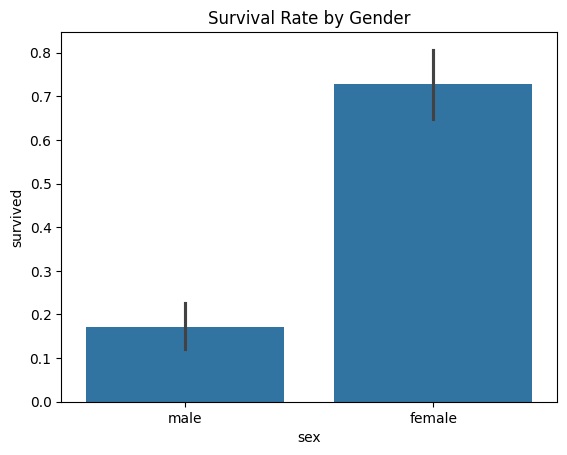

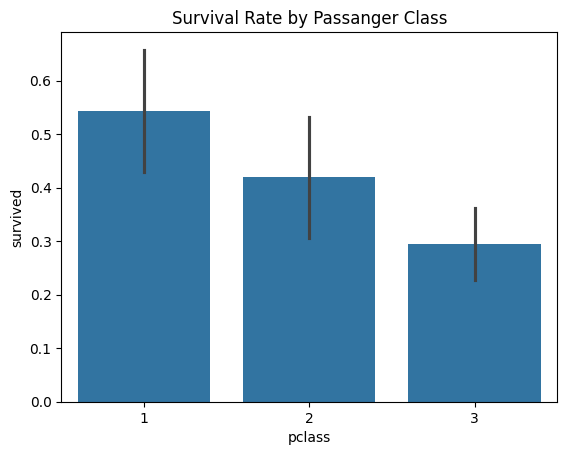

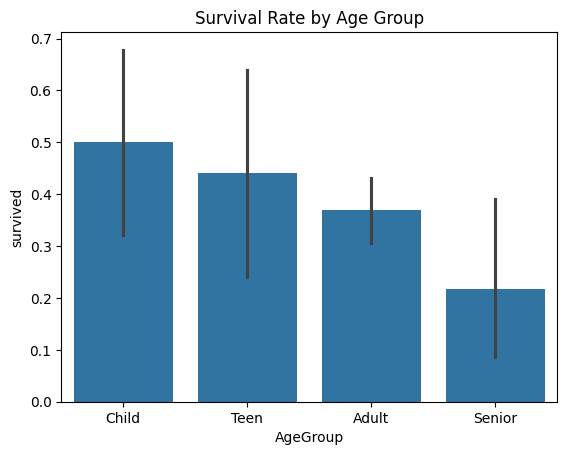

In [7]:
# Plot survival by gender
if "sex" in titanic.columns:
    sns.barplot(x="sex",y="survived",data=titanic)
    plt.title("Survival Rate by Gender")
    plt.show()

# Plot survival by passenger class
if "pclass" in titanic.columns:
    sns.barplot(x="pclass",y="survived",data=titanic)
    plt.title("Survival Rate by Passanger Class")
    plt.show()

# Plot survival by age group
if "AgeGroup" in titanic.columns:
    sns.barplot(x="AgeGroup", y="survived", data=titanic)
    plt.title("Survival Rate by Age Group")
    plt.show()